In [64]:
#Importing the needed packages
import scipy as sp
from scipy import stats
from scipy import integrate   # not included in basic scipy

import matplotlib.pyplot as plt
# ML finds plots too big, thus the customizations:
plt.rcParams['figure.figsize'] = (6,4.5) # Change default size of plots
plt.rcParams['font.size'] = 14           # Change default fontsize for figures
plt.rcParams['figure.autolayout'] = True # Adjusts for changes

# puts figures in the  notebook.
%matplotlib notebook   

In [65]:
#Define any constants used
kB = 1.38 * 10**(-23)

In [66]:
#Choose a temperature
T = 50 #K

In [67]:
#define inverse cumulative distribution function (icdf) for boltzmann dist
# p(E) = e^(-E)/'Z1
#'Z1 is 1
def icdf(u):
    return -sp.log(1-u)

In [68]:
#Generates a number, n, of random energies based on above icdf
def rand_E(n):
    return icdf(sp.stats.uniform.rvs(size=n))

In [69]:
#Defining initial conditions and parameters for harmonic oscillator system
E_0 = rand_E(1) #random energy generated from boltzmann dist
print(E_0)
k0 = 0.05
m = 2
phi = sp.stats.uniform.rvs(size=1)*2*sp.pi #choose a random phase
#Creates initial conditions given phase and parameters
x0 = (2*E_0/k0)**(1/2) * sp.cos(phi)
v0 = (2*E_0/m)**(1/2) * sp.sin(phi)
u0 = sp.array([sp.asscalar(x0),sp.asscalar(v0)])
print((2*E_0/k0)**(1/2), (2*E_0/m)**(1/2))
print(u0)

[ 0.18894253]
[ 2.74912735] [ 0.4346752]
[ 2.40349882 -0.21100323]


In [90]:
def k(t):
    k = k0 + 5*t
    return k

In [91]:
#Defining equation for SHM in system of equations
#Note switched so that these are not dimensionless variables
def shm(u,t):
    x = u[0]
    v = u[1]
    return (v,-(k(t)/m)*x)

In [92]:
#Defining the time interval I want this to take place over
#Getting the integration into an array
tf = 200
tn = 2001
dt = tf/(tn-1)
t = sp.linspace(0,tf,tn)  # NOTE: The  points selected for plotting are 
                           # not the points used for the numerical 
                           # evalution.
x, v = sp.integrate.odeint(shm,u0,t).T

<IPython.core.display.Javascript object>


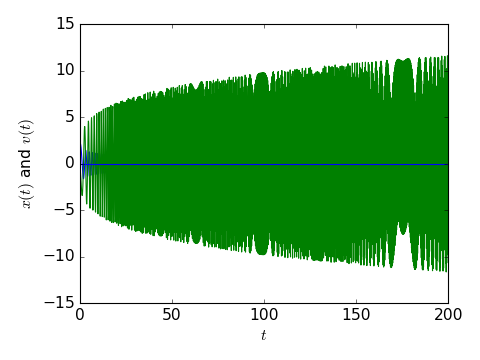

In [93]:
#Plot velocity and position vs time
plt.figure(1)
plt.plot(t,x);
plt.plot(t,v);
plt.axhline(0)
plt.xlabel("$t$")
plt.ylabel("$x(t)$ and $v(t)$")

In [94]:
#Check to make sure equal to u0
print([sp.amax(x),sp.amax(v)])

[2.4034988229527618, 11.610191644927882]


In [95]:
#Calculating energy at each time step
for i in range (0,tn):
    Energy = 1/2*m*v[i]**2 + 1/2*k(i*dt)*x[i]**2
    print(Energy)

0.188942529179
1.62008563741
3.02127759869
4.3818036037
5.68495508468
6.9092194192
8.03008777745
9.02254723359
9.86420136381
10.5388048517
11.0398261228
11.3734946425
11.560686813
11.6370041104
11.6505372002
11.6571162789
11.7133021198
11.8679269208
12.1535286996
12.5794099876
13.1281243705
13.7568381612
14.4041855308
15.0020208662
15.4901008313
15.8305539789
16.018420916
16.084909791
16.0914477702
16.1149336645
16.2272899597
16.4746679183
16.8626216426
17.3526150629
17.872274401
18.3374834628
18.680036701
18.8717387768
18.9359458143
18.9410950789
18.9769837069
19.121392946
19.4093944275
19.8179716518
20.2735838486
20.6813379445
20.9648926044
21.1003531522
21.1284775452
21.1380127649
21.2258884647
21.4516164722
21.8076400922
22.2213512596
22.5898259057
22.8315605361
22.9292931005
22.9406508877
22.9689593778
23.1078858154
23.3892675451
23.7638455086
24.1278013171
24.3820759885
24.4910337346
24.5051261538
24.5318722552
24.67053951
24.9497907202
25.3081830111
25.6321629179
25.8293616893
2